## Exploratory anlaysis 

### This script contains the following: 

01. Libraries & data import 
02. Data Checks 
03. Exploring Relationships
     -  Heatmaps
     -   Scatterplots
     -  Pair Plots 
     -  Categorical Plots


## 1. Libraries & Data Import

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
%matplotlib inline

In [4]:
# Import data set

file_path = "/Users/biancaskyehoney/Documents/World Happiness Report /02 Data /Prepared Data/df_clean.csv"
df = pd.read_csv(file_path, index_col=0)

## 2. Data Checks 

In [5]:
df.head()

,Country,Region,Rank,Score,GDP,Life Expectancy,Freedom,Corruption,Generosity,year
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015


In [6]:
df.columns

Index(['Country', 'Region', 'Rank', 'Score', 'GDP', 'Life Expectancy',
       'Freedom', 'Corruption', 'Generosity', 'year'],
      dtype='object')

In [7]:
df.dtypes

Country             object
Region              object
Rank                 int64
Score              float64
GDP                float64
Life Expectancy    float64
Freedom            float64
Corruption         float64
Generosity         float64
year                 int64
dtype: object

#### Missing values check

In [8]:
df.shape

(782, 10)

In [9]:
df.isnull().sum()

Country            0
Region             0
Rank               0
Score              0
GDP                0
Life Expectancy    0
Freedom            0
Corruption         1
Generosity         0
year               0
dtype: int64

In [10]:
missing_values = df['Corruption'].isna() 

In [11]:
print(df[missing_values])

                 Country                           Region  Rank  Score    GDP  \
19  United Arab Emirates  Middle East and Northern Africa    20  6.774  2.096   

    Life Expectancy  Freedom  Corruption  Generosity  year  
19             0.67    0.284         NaN       0.186  2018  


Hmm. Unfortunately it would have been good to see if we have the data that shows the scew (not available in df_2018) - this could have helped us in deciding whether to use mean or median.

I think it would be good to compare what this region scored for corruption on all the previous and following years 


In [12]:
# Let's pull up this countries information
country_name = "United Arab Emirates"

# Filter the DataFrame based on the country name
country_info = df[df['Country'] == country_name]

# Print the information for the specified country
print(country_info)

                 Country                           Region  Rank  Score  \
19  United Arab Emirates  Middle East and Northern Africa    20  6.901   
27  United Arab Emirates  Middle East and Northern Africa    28  6.573   
20  United Arab Emirates  Middle East and Northern Africa    21  6.648   
19  United Arab Emirates  Middle East and Northern Africa    20  6.774   
20  United Arab Emirates  Middle East and Northern Africa    21  6.825   

         GDP  Life Expectancy   Freedom  Corruption  Generosity  year  
19  1.427270         0.809250  0.641570     0.38583    0.264280  2015  
27  1.573520         0.729930  0.562150     0.35561    0.265910  2016  
20  1.626343         0.726798  0.608345     0.32449    0.360942  2017  
19  2.096000         0.670000  0.284000         NaN    0.186000  2018  
20  1.503000         0.825000  0.598000     0.18200    0.262000  2019  


I think it would be best to us the mean across the years for this country in order to replace this missing value

In [13]:
country_name = "United Arab Emirates"

# Filter the DataFrame for the specified country
country_info = df[df['Country'] == country_name]

# Calculate the mean of "Corruption" for the specified country
corruption_mean = country_info['Corruption'].mean()

In [14]:
print(corruption_mean)

0.3119823909258842


In [15]:
# Replace missing values in the "Corruption" column with the specified value
df['Corruption'].fillna(0.3119823909258842, inplace=True)

In [16]:
# Let's check to see if it worked

uae_data = df[df['Country'] == country_name]

print(uae_data)

                 Country                           Region  Rank  Score  \
19  United Arab Emirates  Middle East and Northern Africa    20  6.901   
27  United Arab Emirates  Middle East and Northern Africa    28  6.573   
20  United Arab Emirates  Middle East and Northern Africa    21  6.648   
19  United Arab Emirates  Middle East and Northern Africa    20  6.774   
20  United Arab Emirates  Middle East and Northern Africa    21  6.825   

         GDP  Life Expectancy   Freedom  Corruption  Generosity  year  
19  1.427270         0.809250  0.641570    0.385830    0.264280  2015  
27  1.573520         0.729930  0.562150    0.355610    0.265910  2016  
20  1.626343         0.726798  0.608345    0.324490    0.360942  2017  
19  2.096000         0.670000  0.284000    0.311982    0.186000  2018  
20  1.503000         0.825000  0.598000    0.182000    0.262000  2019  


In [17]:
df.isnull().sum()

Country            0
Region             0
Rank               0
Score              0
GDP                0
Life Expectancy    0
Freedom            0
Corruption         0
Generosity         0
year               0
dtype: int64

Much Better - that is a cleaner dataset ready for exploration. 

In [18]:
# Find duplicates

df_dups = df[df.duplicated()]

In [19]:
df_dups.shape

(0, 10)

In [20]:
# Mixed type Data 

for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        

### Exploring relationships

#### 1. Correlation

In [21]:
# Create a correlation matrix using pandas

df.corr(numeric_only=True)

,Rank,Score,GDP,Life Expectancy,Freedom,Corruption,Generosity,year
Rank,1.000000,-0.992066,-0.794791,-0.743655,-0.537942,-0.374567,-0.117713,-0.007768
Score,-0.992066,1.000000,0.789284,0.742456,0.551258,0.400026,0.137578,0.007065
GDP,-0.794791,0.789284,1.000000,0.784338,0.340511,0.310581,-0.014560,0.019768
Life Expectancy,-0.743655,0.742456,0.784338,1.000000,0.340745,0.250529,0.010638,0.130302
Freedom,-0.537942,0.551258,0.340511,0.340745,1.000000,0.456604,0.290706,0.010353
Corruption,-0.374567,0.400026,0.310581,0.250529,0.456604,1.000000,0.317672,-0.120382
Generosity,-0.117713,0.137578,-0.014560,0.010638,0.290706,0.317672,1.000000,-0.192587
year,-0.007768,0.007065,0.019768,0.130302,0.010353,-0.120382,-0.192587,1.000000


/var/folders/bv/g153b5q91hz3vzfclz_k_tv80000gn/T/ipykernel_4331/2845793157.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


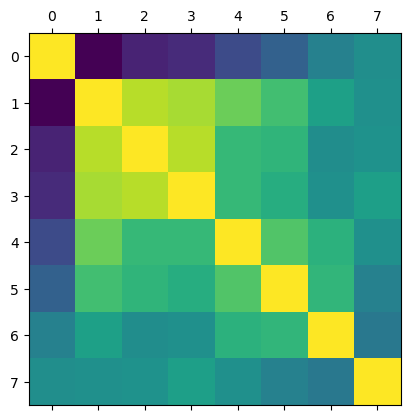

In [22]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

### Create a correlation heatmap using seaborn 

In [23]:
df.columns

Index(['Country', 'Region', 'Rank', 'Score', 'GDP', 'Life Expectancy',
       'Freedom', 'Corruption', 'Generosity', 'year'],
      dtype='object')

In [24]:
sub = df[['Rank', 'Score', 'GDP', 'Life Expectancy',
       'Freedom', 'Corruption', 'Generosity', 'year']]

In [25]:
sub

,Rank,Score,GDP,Life Expectancy,Freedom,Corruption,Generosity,year
0,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...
151,152,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,2019
152,153,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,2019
153,154,3.203,0.35000,0.36100,0.00000,0.02500,0.15800,2019
154,155,3.083,0.02600,0.10500,0.22500,0.03500,0.23500,2019


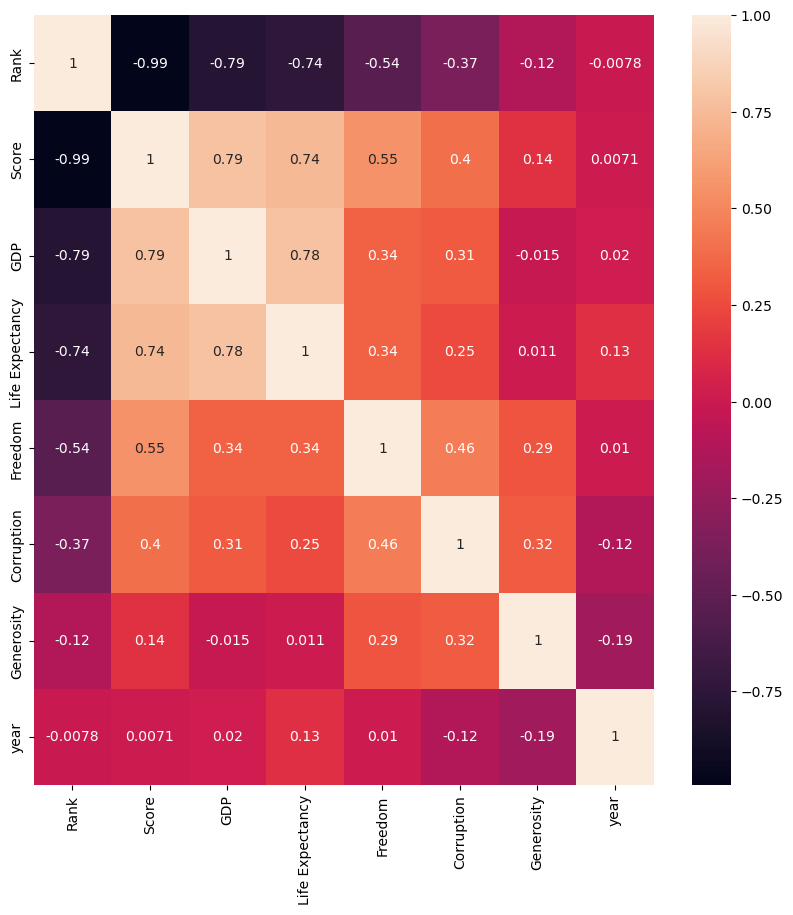

In [28]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot=True, ax=ax)

# file path
path = "/Users/biancaskyehoney/Documents/World Happiness Report/04 Analysis/Visualisations/"
file_name = 'corr.png'
file_path = os.path.join(path, file_name)

# Create the directory if it doesn't exist - was having problems with my directory
os.makedirs(path, exist_ok=True)

# Save the figure to a file
f.savefig(file_path, format='png', bbox_inches='tight')

# Display the plot 
plt.show()

Very much as expected - GDP has a significant correlation with happiness score. Freedom also plays a major role in happiness score

Let's create Scatterplots for GDP & Life Expectancy

### Scatterplots

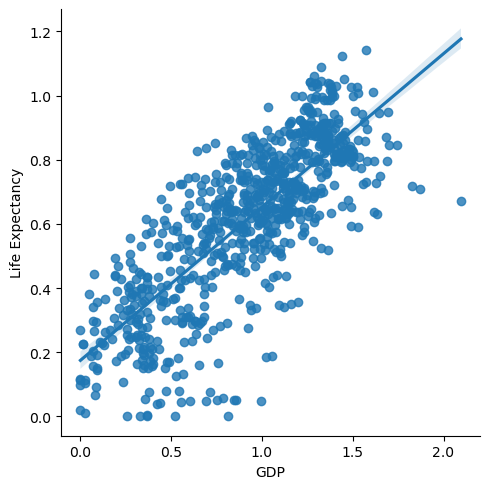

In [29]:
# Create a scatterplot for the "life expectancy" and "GDP" columns in seaborn

sns.lmplot(x = 'GDP', y = 'Life Expectancy', data = df)

### Pair Plots 

In [30]:
# Let's keep only the variables we want to plot

sub_2 = sub[['Rank','GDP', 'Life Expectancy',
       'Freedom', 'Corruption']]

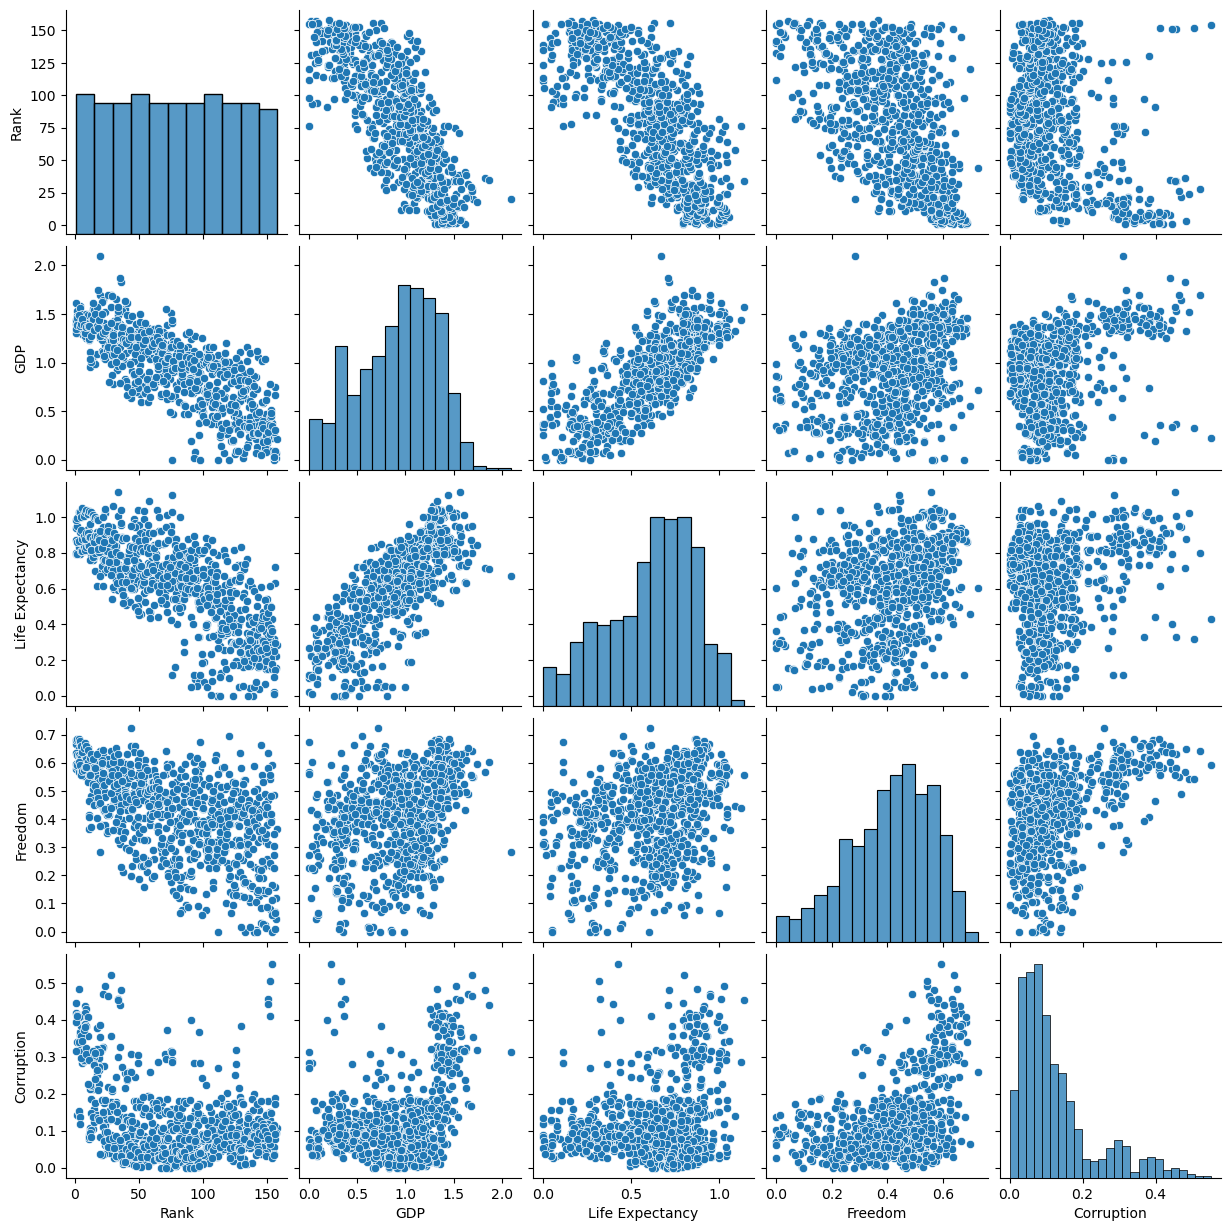

In [31]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### Categorical Plots

<Axes: xlabel='GDP', ylabel='Count'>

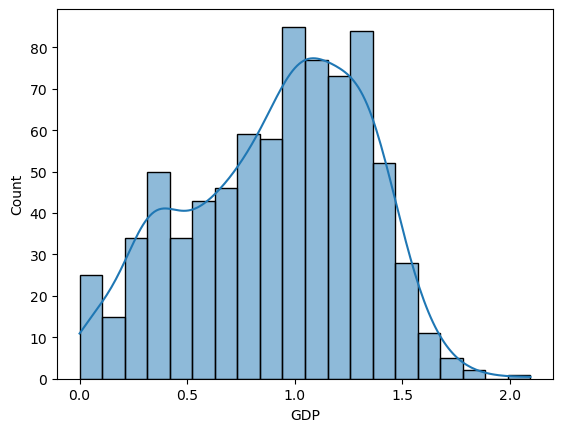

In [32]:
# Let's create a categorical plot for GDP 

sns.histplot(df['GDP'], bins = 20, kde = True)

In [33]:
df.loc[df['GDP'] < 0.5, 'GDP Level'] = 'Lower GDP'

In [34]:
df.loc[(df['GDP'] >= 0.5) & (df['GDP'] < 1.5), 'GDP Level'] = 'Mid-Range GDP'

In [35]:
df.loc[df['GDP'] >= 1.5, 'GDP Level'] = 'Higher GDP'

In [36]:
df['GDP'].value_counts(dropna = False)

0.00000    5
0.96000    4
0.33200    3
1.34000    3
1.00400    2
          ..
1.01930    1
0.74037    1
0.25558    1
0.97724    1
0.30600    1
Name: GDP, Length: 742, dtype: int64

In [37]:
df.columns

Index(['Country', 'Region', 'Rank', 'Score', 'GDP', 'Life Expectancy',
       'Freedom', 'Corruption', 'Generosity', 'year', 'GDP Level'],
      dtype='object')

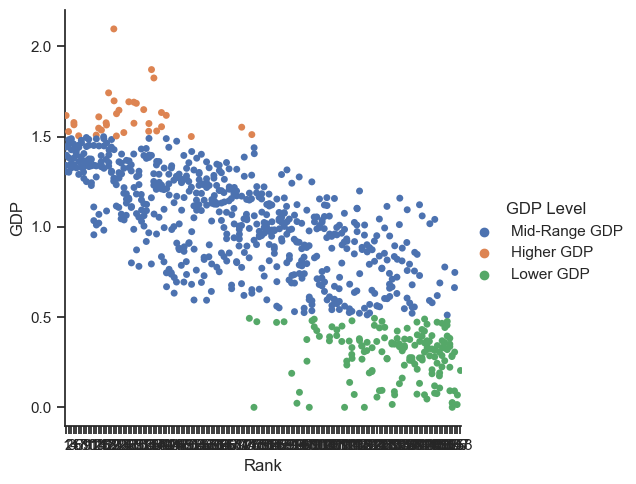

<Figure size 5000x500 with 0 Axes>

In [38]:
# Define 'x' and 'y' based on your data
sns.set(style="ticks")
g = sns.catplot(x="Rank", y="GDP", hue="GDP Level", data=df)
plt.figure(figsize=(50, 5))

# Display the graph
plt.show()

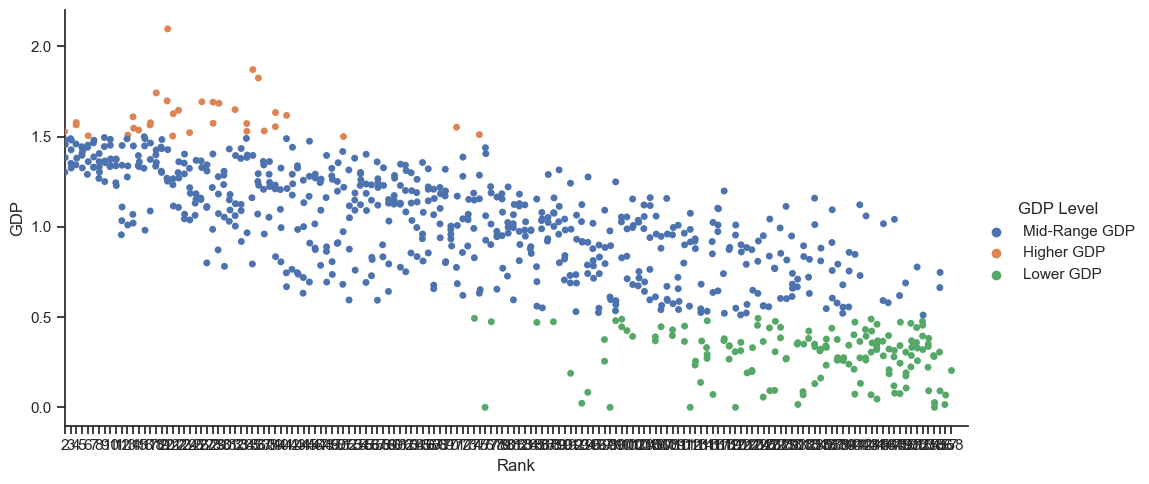

In [39]:
# Create a categorical plot in Seaborn using the provided data
sns.set(style="ticks")
g = sns.catplot(x="Rank", y="GDP", hue="GDP Level", data=df, height=5, aspect=2)

# Customize the x-axis tick rotations
ax.set_xticks(ax.get_xticks()[::10])

# Set the x-axis limits to a fixed scale from 1 to 10
plt.xlim(1, 160)

# Display the graph
plt.show()

Hmm not sure my x-axis is meant to look like that?? - doubtful

###  Hypothesis

The higher the countries GDP, the happier the country will be on a happiness score scale. 

In [40]:
# Export the Cleaned dataframe 

# Define the file path for exporting the DataFrame
export_path = "/Users/biancaskyehoney/Documents/World Happiness Report /02 Data /Prepared Data/df_explored.csv"

# Export the DataFrame to a csv file
df.to_csv(export_path)